In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [5]:
df = pd.read_csv("customers.csv")
df.head()

,CustomerID,AnnualIncome,SpendingScore
0,1,15,79
1,2,16,81
2,3,17,76
3,4,18,75
4,5,19,73


In [97]:
model = KMeans(n_clusters=5, random_state=0)
df['Cluster'] = model.fit_predict(df[['AnnualIncome','SpendingScore']])
centers = model.cluster_centers_
df.head()

,CustomerID,AnnualIncome,SpendingScore,Cluster
0,1,15,79,2
1,2,16,81,2
2,3,17,76,2
3,4,18,75,2
4,5,19,73,2


In [94]:
new_annual_income= int(input("Enter Annual Income: \n"))
spending_score = int(input("Enter Spending Score: \n"))
predicted_cluster = model.predict(pd.DataFrame([[new_annual_income,spending_score]], columns=['AnnualIncome','SpendingScore']))

print(f"\nThe new entry ({new_annual_income}, {spending_score }) belongs to cluster {predicted_cluster[0]}")

Enter Annual Income: 
 15
Enter Spending Score: 
 79



The new entry (15, 79) belongs to cluster 2


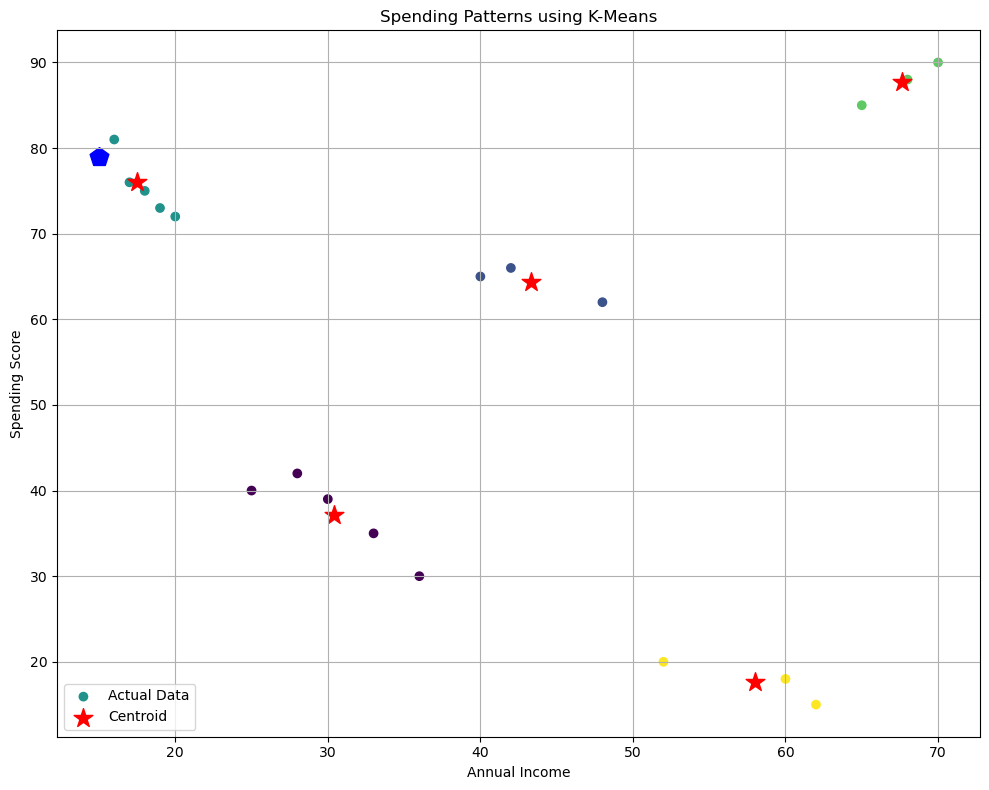

In [100]:
plt.figure(figsize=(10,8))
plt.scatter(df['AnnualIncome'], df['SpendingScore'], c=df['Cluster'],label='Actual Data')
plt.scatter(centers[:,0], centers[:,1], c='red', marker='*', s=200, label='Centroid')
plt.scatter(new_annual_income, spending_score, c='blue', marker='p', s=200)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Spending Patterns using K-Means')
plt.legend(loc='lower left')
plt.tight_layout()
plt.grid(True)
plt.show()